In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.utils import shuffle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wataneya-website-dataset/wataneya_data.csv
/kaggle/input/trustnews-website-database/trustnews_data.csv
/kaggle/input/data-to-use-to-store-values/data (1).csv
/kaggle/input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl
/kaggle/input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl.trainables.syn1neg.npy
/kaggle/input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl.wv.vectors.npy


In [2]:
data=pd.read_csv('/kaggle/input/data-to-use-to-store-values/data (1).csv')

In [3]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [4]:
data.head()

,category,type,texts,fake
0,ﺇﻗﺘﺼﺎﺩ,ﺻﺤﻴﺢ,سفر ولن طلع ءنف رحل ولج ونس وعد دفق لسح عرب سف...,1
1,ﻣﺠﺘﻤﻊ,ﻣﺨﺎﺩﻉ,لوح شرع شهد لعب عمر جزءر ليست ونس ثبت ريق روس ...,0
2,جهات,ﺻﺤﻴﺢ,حرق فجء جمع كمء ظله نوج رتفع درج لحررهعءشه لجم...,1
3,جهات,ﺻﺤﻴﺢ,سوس ولق قبض على روج خطر خدر صيل لوه جور سمم بر...,1
4,ﺭﻳﺎﺿﺔ,ﺯاﺋﻒ,عبد سلم لنس غدر ونس نشر مقع للكترن خبر هرب رءس...,0


# **Data Description**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4348 non-null   object
 1   type      4348 non-null   object
 2   texts     4348 non-null   object
 3   fake      4348 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 136.0+ KB


In [6]:
print("Data Shape:", data.shape)

Data Shape: (4348, 4)


<AxesSubplot:xlabel='fake', ylabel='count'>

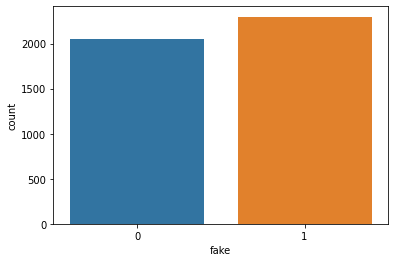

In [7]:
sns.countplot(x='fake', data=data)

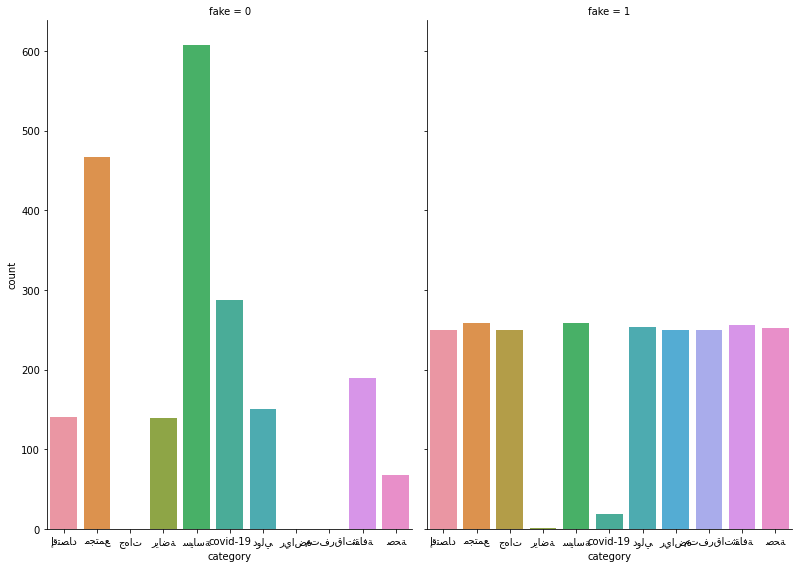

In [8]:
g = sns.catplot(x="category", col="fake",
                data=data, kind="count",
                height=8, aspect=.7);

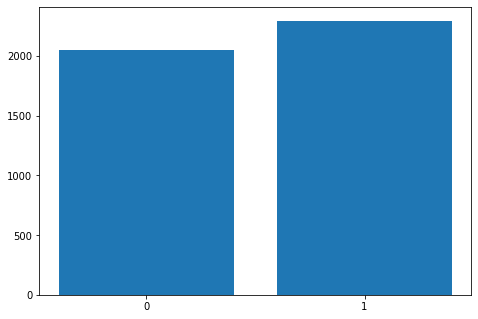

In [9]:
lista=[(data.fake == 0).sum(),(data.fake == 1).sum()]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1']
ax.bar(langs,lista)
plt.show()

# **Data Preparation**

In [10]:
import string,re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('\r', '', text)
    return text


In [11]:
data['texts'] = data['texts'].apply(lambda x: remove_punct(x))

Arabic words cleaning

https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb

In [12]:
!pip install pyarabic
!pip install farasapy
!pip install tashaphyne

     |████████████████████████████████| 251 kB 287 kB/s            


In [13]:
from nltk.corpus import stopwords
from textblob import TextBlob

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
import tashaphyne.arabic_const as arabconst 

stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

import pyarabic.araby as araby
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

Trying examples

In [14]:
text="قالوا الموفقُ شِيعِيٌّ فقلتُ لهم"
normalizeArabic(text)

'قالوا الموفق شيعي فقلت لهم'

In [15]:
test=data['texts'][5]
print(test)

هشم حمد صرح بون على عدد ولي رءس جمهر نصب خلف رءس حكم نشر مقع Tunisie صفح كل قيس سعد على سبك صرح سبت لسس ونس رءسق قلل هشم حمد قول عدد ولي رءس لجمهرهتنصب سيف لدن خلف رءس حكمهفرق عمل روس نوز حري مرر تبب زءفذلك فحص دون هشم حمد على صفح رسم قطع حلق رنمجهعل صفح رسم قنو قلل وقن على تبقد صرح حمد نسب قسسعد قلب خير ريد رجع ونس ولي لدكتتر طلب بمسرتمظهر عزل جرء تخب بكر لكن يدع عيي رءس جمهر نصب سيف لدنمخلف رءس حكم هشم حمد ونو على عدد ولي رءس جمهر نصب خلف رءس حكم


In [16]:
normalizeArabic(test)

'هشم حمد صرح بون علي عدد ولي رءس جمهر نصب خلف رءس حكم نشر مقع Tunisie صفح كل قيس سعد علي سبك صرح سبت لسس ونس رءسق قلل هشم حمد قول عدد ولي رءس لجمهرهتنصب سيف لدن خلف رءس حكمهفرق عمل روس نوز حري مرر تبب زءفذلك فحص دون هشم حمد علي صفح رسم قطع حلق رنمجهعل صفح رسم قنو قلل وقن علي تبقد صرح حمد نسب قسسعد قلب خير ريد رجع ونس ولي لدكتتر طلب بمسرتمظهر عزل جرء تخب بكر لكن يدع عيي رءس جمهر نصب سيف لدنمخلف رءس حكم هشم حمد ونو علي عدد ولي رءس جمهر نصب خلف رءس حكم'

In [17]:
remove_stop_words(test)

'هشم حمد صرح بون ولي رءس جمهر نصب رءس حكم نشر مقع Tunisie صفح قيس سعد سبك صرح لسس ونس رءسق قلل هشم حمد قول ولي رءس لجمهرهتنصب سيف رءس حكمهفرق عمل روس نوز حري مرر تبب زءفذلك فحص هشم حمد صفح رسم قطع حلق رنمجهعل صفح رسم قنو قلل وقن تبقد صرح حمد نسب قسسعد قلب خير ريد ونس ولي لدكتتر طلب بمسرتمظهر عزل جرء تخب بكر يدع عيي رءس جمهر نصب سيف لدنمخلف رءس حكم هشم حمد ونو ولي رءس جمهر نصب رءس حكم'

In [18]:
stem(test) 

'هشم حمد صرح بون على عدد لي رءس جمهر صبب خلف رءس حكم نشر مقع Tunisie صفح كل قيس عدد على بكك صرح بتت لسس نسس رءسق قلل هشم حمد قول عدد لي رءس جمهرهتنصب سيف لدن خلف رءس حكمهفرق عمل روس نوز حرر مرر تبب زءفذلك حصص دون هشم حمد على صفح رسم قطع حلق رنمجهعل صفح رسم قنو قلل وقن على بقد صرح حمد نسب قسسعد قلب خير ريد رجع نسس لي لدكتتر طلب سرتمظهر عزل جرء خبب بكر لكن يدع عيي رءس جمهر صبب سيف دنمخلف رءس حكم هشم حمد ونو على عدد لي رءس جمهر صبب خلف رءس حكم'

In [19]:
def remove_dirt_after_transformation(text):
    return re.sub('[a-z]|[A_Z]|[0-9]|\n|:|N|,*', '', text)

In [20]:
from sklearn.model_selection import train_test_split
X = data.texts.values
y = data.fake.values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,shuffle=True, random_state=42)

In [22]:
data['texts'] = data['texts'].apply(lambda x:normalizeArabic(x))
data['texts'] = data['texts'].apply(lambda x:remove_stop_words(x))
data['texts'] = data['texts'].apply(lambda x:stem(x))

In [23]:
data.head()

,category,type,texts,fake
0,ﺇﻗﺘﺼﺎﺩ,ﺻﺤﻴﺢ,سفر لن طلع ءنف رحل ولج نسس عدد دفق سحح عرب سفر...,1
1,ﻣﺠﺘﻤﻊ,ﻣﺨﺎﺩﻉ,لوح شهد عبب عمر جزءر نسس ثبب ريق روس نوز صور ق...,0
2,جهات,ﺻﺤﻴﺢ,حرق فجء جمع كمء ظلل نوج رفع درج حررهعءشه لجم ج...,1
3,جهات,ﺻﺤﻴﺢ,سوس لقق قبض على روج خطر خدر صيل لوه جور سمم بر...,1
4,ﺭﻳﺎﺿﺔ,ﺯاﺋﻒ,عبد سلم نسس غدر نسس نشر مقع كتر خبر هرب رءس نو...,0


In [24]:
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

# **Deep Learning Approach**

In [25]:
import tensorflow as tf
import keras.models
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,SimpleRNN
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

The Tokenizer()function will split the sentence into tokens. The texts_to_sequences()convert word to integer number. 

In [26]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(data["texts"])
vocab_size = len(t.word_index) + 1

In [27]:
list_tokenized_train=t.texts_to_sequences(X_train)
list_tokenized_test=t.texts_to_sequences(X_test)

In [28]:
#list_tokenized_train[:1] just for testing

Checking word distribution to pick the max sentence length

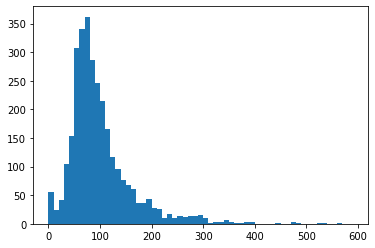

In [29]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,600,10))
plt.show()

Most words have a length around 120 and all are less than 600 its a big number but better pick 580 to prevent any information loss

In [30]:
maxlen = 128
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [31]:
# A simpleRNN without any pretrained embeddings and one dense layer
model = Sequential()
model.add(Embedding(vocab_size,100, input_length=maxlen))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
model.fit(X_t,y_train, batch_size=32, epochs=10, validation_split=0.1)

In [ ]:
loss,acc = model.evaluate(X_te,y_test, verbose = 0, batch_size = 32)
print("acc: %.5f" % (acc))

**LSTM**


In [ ]:
inp = Input(shape=(maxlen, ))
embed_size = 100
x = Embedding(vocab_size, embed_size)(inp)
x = LSTM(100, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
#x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)

In [ ]:
model2 = Model(inputs=inp, outputs=x)
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print(model2.summary())

In [ ]:
model2.fit(X_t,y_train, batch_size=32, epochs=10, validation_split=0.1)

In [ ]:
#preds = model.predict(X_te, batch_size=32)
#print(preds)

In [ ]:
loss,acc = model2.evaluate(X_te,y_test, verbose = 0, batch_size = 32)
print("acc: %.5f" % (acc))

**LSTM with a pretrained word2vec model aravec**

loading the AraVec Skip-gram word embedding 

In [ ]:
w2v_embeddings_index={}
TOTAL_EMBEDDING_DIM=300
embeddings_file='../input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl'
w2v_model =KeyedVectors.load(embeddings_file)


In [ ]:
words = list(w2v_model.wv.index_to_key)

In [ ]:
w2v_embeddings_index={}
for key in words:
    w2v_embeddings_index[key] =w2v_model.wv.get_vector(key)

In [ ]:
print("Loaded %s word vectors."% len(w2v_embeddings_index))

create a weight matrix for words in training docs

In [ ]:
embedding_matrix = np.zeros((vocab_size, TOTAL_EMBEDDING_DIM))
for word, i in t.word_index.items():
    embedding_vector = w2v_embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
print("Embedding Matrix shape:", embedding_matrix.shape)

The embedding layer is seeded by AraVec word embedding weight. The 300-dimensional Twitter Skip-gram version 3 was chosen. Therefore, the embedding layer defend with output_dim equal to 300.

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, TOTAL_EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False)

lstm+aravec

In [ ]:
input_placeholder= Input(shape=(maxlen,))
input_embedding = embedding_layer(input_placeholder)
lstm= LSTM(100, return_sequences=True,name='lstm_layer_2')(input_embedding)
y = GlobalMaxPool1D()(lstm)
#y = Dropout(0.1)(y)
y = Dense(50, activation="relu")(lstm)
y = Dropout(0.1)(y)
preds = Dense(1, activation='sigmoid', name = 'activation')(y)
modelaravec = Model(inputs=input_placeholder, outputs=preds)

In [ ]:
modelaravec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#modelaravec.fit(X_t,y_train, batch_size=32, epochs=25, validation_split=0.1)

In [ ]:
print(modelaravec.summary())

In [ ]:
modelaravec.fit(X_t,y_train, batch_size=32, epochs=10, validation_split=0.2)

In [ ]:
loss,accuracy = modelaravec.evaluate(X_te,y_test,verbose=0)
print("Accuracy: %5f" % (accuracy))

simplernn+aravec

In [ ]:
input_placeholder= Input(shape=(maxlen,))
input_embedding = embedding_layer(input_placeholder)
rnn= SimpleRNN(100, return_sequences=True,name='SimpleRnnLayer')(input_embedding)
preds = Dense(1, activation='sigmoid', name = 'activation')(rnn)
model_aravec_2 = Model(inputs=input_placeholder, outputs=preds)

In [ ]:
print(model_aravec_2.summary())

In [ ]:
model_aravec_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_aravec_2.fit(X_t,y_train, batch_size=32, epochs=10, validation_split=0.2)

In [ ]:
loss,accuracy = modelaravec.evaluate(X_te,y_test,verbose=0)
print("Accuracy: %5f" % (accuracy))